##### Quantum Computing 2024/2025
### Lecture 5 - Grover's Algorithm


1. [Grover's Algorithm](#Grover) <p>
   a.  [Unstructured search](#unstructured-search) <p>
   b.  [Oracle](#oracle_intro) <p>
   c.  [Amplitude Amplification](#amplitude_amp) <p>
2. [Grover's algorithm with 2 qubits](#grover2)
3. [Grover's algorithm with 3 qubits](#grover3)
4. [Removing the ancilla](#ancilla)
5. [Uknown number of solutions](#unknown)

## 1. Grover's algorithm <a id="grover"></a>

Grover's algorithm is one of the most powerful quantum algorithms. The algorithm is known for a quadratic speed up in searching for an element in an **unstructured database**. 

Grover's algorithm can be used in any problem that can be restated as an unstructured search problem:

* Finding minimum/maximum/mean 
* Collision problem 
* Satisfiability 
* Optimization in general. 

### a. Unstructured Search <a id="unstructured-search"></a>

Suppose you have an array of $N$ items. Consider that $w$ for winner is the element we want to find. 

![image1](images/list.png)

Classic $\quad \Rightarrow \quad \mathcal{O}(N)$

Quantum $\quad \Rightarrow \quad \mathcal{O}(\sqrt{N})$

### b. Oracle

Notice that we want to exploit the superposition principle, therefore, all entries in the above database will happen at the same time! Thus, for us, the database is composed by all computational basis states our qubits can be in.

The oracle $U_w$ adds a negative phase to the solution states i.e. for any state $|x\rangle$ in the computational basis corresponding to the winner:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

we can use an ancilla to store the result of the function! 


Similar to Deutsch-Jozsa, we initialize the 'output' qubit in the state $|{-}\rangle$, and the phase kickback effect do the rest.
</p><p>  

![image1](images/function.png)


Now, the goal is to find a routine that amplifies the probability of measuring the winner state! 

### c. Amplitude Amplification <a id="amplitude_amp"></a>

The Diffusion operator $D$ is a reflection about the mean of the amplitudes. It is defined as:

$$D = 2|DB \rangle \langle DB| - I$$

where |DB\rangle is the database superposition quantum state. D amplifies the amplitude of the winner state.

Full Grover's circuit is:
![image5](images/full_circuit.png)

## 2. Grover's algorithm with 2 qubits <a id="grover2"></a>

Let's suppose we want to find the state $|11\rangle$.
Build the Grover's algorithm and check the probabilities 

In [3]:
import pennylane as qml
from pennylane import numpy as np

def grover(n_qubits, id):

    #create registers 
    input_registers = range(n_qubits)
    ancilla_register = [n_qubits]

    #superposition
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    qml.PauliX(wires=ancilla_register)
    qml.Hadamard(wires=ancilla_register)

    qml.Barrier()

    #oracle
    for i,k in enumerate(id):
        if k == 0:
            qml.PauliX(wires=input_registers[i])
    qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register)
    for i,k in enumerate(id):
        if k == 0:
            qml.PauliX(wires=input_registers[i])

    #or using the MultiControlledX gate with control state
    #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

    qml.Barrier()
    
    #diffusion
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")
    qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
    qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
    qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    qml.Barrier()
    

    #measurement
    return qml.probs(wires=input_registers)

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

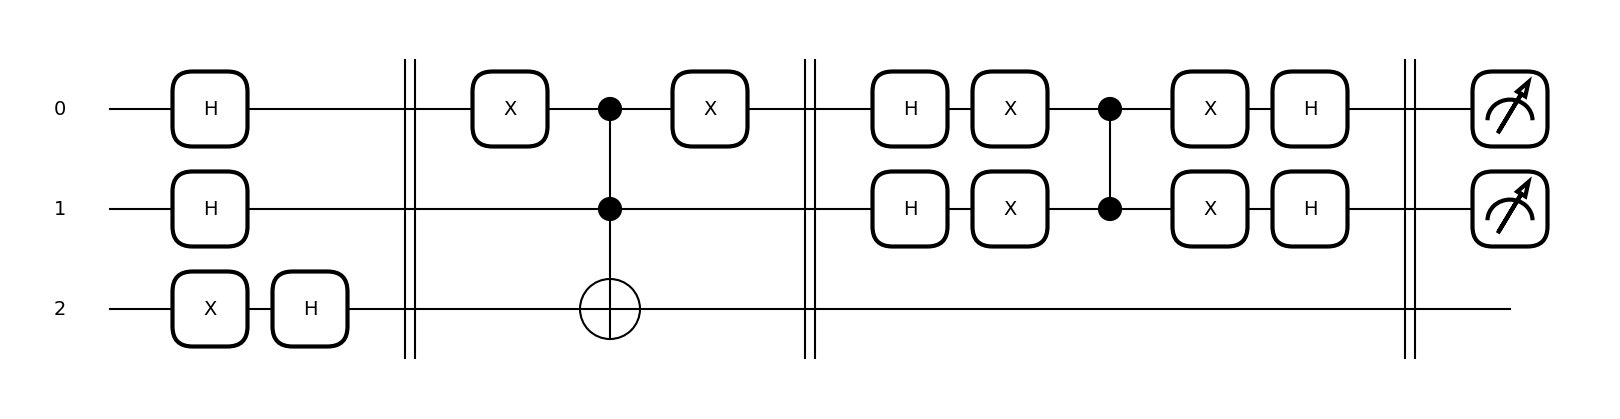

In [2]:
n_qubits = 2
id = [0,1]

dev = qml.device("default.qubit", wires=n_qubits+1)

Grover = qml.QNode(grover, dev)

qml.draw_mpl(Grover)(n_qubits, id)

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


Text(0.5, 1.0, 'Probability Distribution')

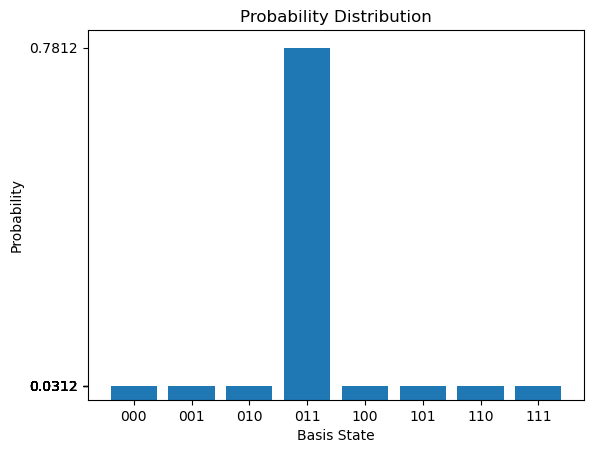

In [46]:
#Run the algorithm

probs = Grover(n_qubits, id)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)
plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



## 3. Grover's algorithm with 3 qubits <a id="grover3"></a>  


Let's suppose we want to find the state $|011\rangle$. Run Grover's algorithm and check the probabilities.

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


Text(0.5, 1.0, 'Probability Distribution')

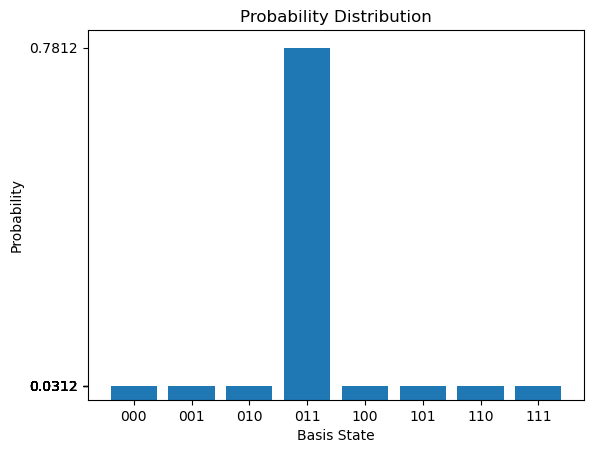

In [55]:
#Run the algorithm

n_qubits = 3
id = [0,1,1]

dev = qml.device("default.qubit", wires=n_qubits+1)

Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, id)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)
plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



Let's amplify the probability of measuring the winner state!

In [3]:
def grover(n_qubits, id, iterations=1):

    #create registers 
    input_registers = range(n_qubits)
    ancilla_register = [n_qubits]

    #superposition
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    qml.PauliX(wires=ancilla_register)
    qml.Hadamard(wires=ancilla_register)

    qml.Barrier()

    for _ in range(iterations):
        #oracle
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register)
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])

        #or using the MultiControlledX gate with control state
        #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

        qml.Barrier()
        
        #diffusion
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

        qml.Barrier()
    

    #measurement
    return qml.probs(wires=input_registers)

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


(<Figure size 2600x400 with 1 Axes>, <Axes: >)

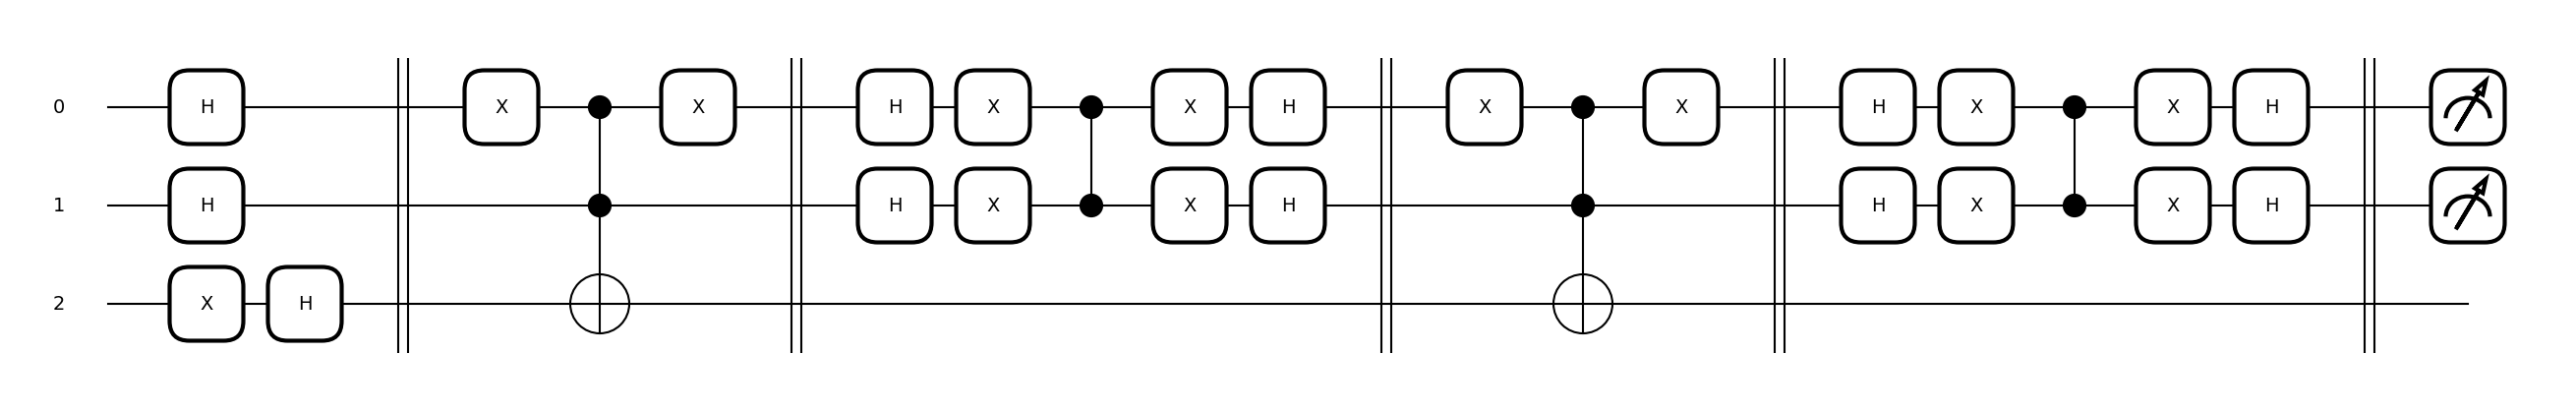

In [6]:
n_qubits = 2
id = [0,1]
itarations = 2

dev = qml.device("default.qubit", wires=n_qubits+1)

Grover = qml.QNode(grover, dev)

qml.draw_mpl(Grover)(n_qubits, id, iterations=itarations)

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


Text(0.5, 1.0, 'Probability Distribution')

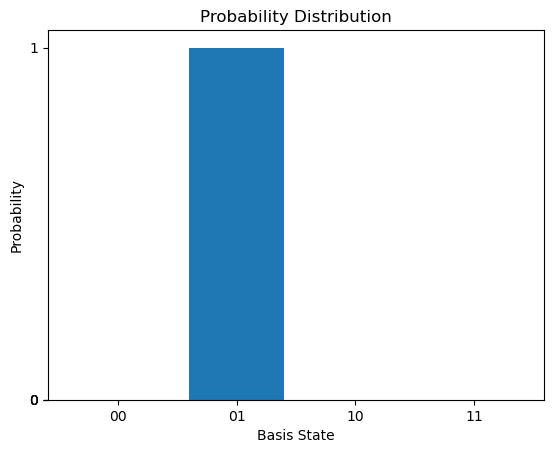

In [14]:
#Run the algorithm

probs = Grover(n_qubits, id, iterations=7)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



Optimal number of iterations:

In [27]:
def grover(n_qubits, id, iterations="optimal"):

    #create registers 
    input_registers = range(n_qubits)
    ancilla_register = [n_qubits]

    #superposition
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    qml.PauliX(wires=ancilla_register)
    qml.Hadamard(wires=ancilla_register)

    qml.Barrier()

    if iterations == "optimal":
        its = int(np.floor(np.pi/4*np.sqrt(2**n_qubits)))
    else:
        its = iterations
        
    for _ in range(its):
        #oracle
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register)
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])

        #or using the MultiControlledX gate with control state
        #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

        qml.Barrier()
        
        #diffusion
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

        qml.Barrier()
    

    #measurement
    return qml.probs(wires=input_registers)

/opt/homebrew/Caskroom/miniforge/base/envs/jaxqrl/lib/python3.9/site-packages/pennylane/ops/op_math/controlled_ops.py:1103: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


Text(0.5, 1.0, 'Probability Distribution')

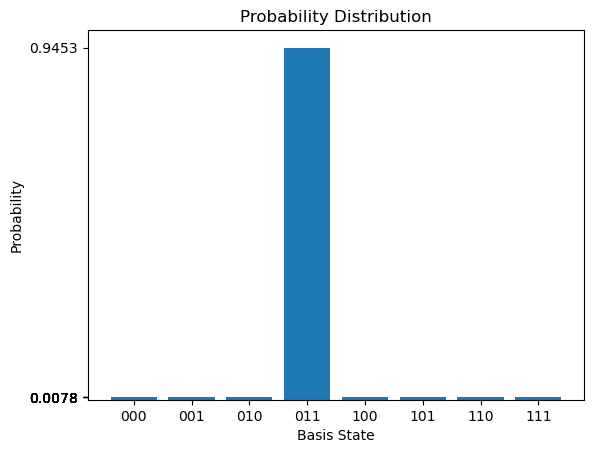

In [28]:
#Run the algorithm

n_qubits = 3
id = [0,1,1]
itarations = 6

dev = qml.device("default.qubit", wires=n_qubits+1)

Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, id, iterations="optimal")

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



In [29]:
n_qubits = 3
j=6
np.sin((2*j + 1) * np.arcsin(1/np.sqrt(2**n_qubits)))**2

0.9997863769531249

In [9]:
int(np.floor(np.pi/4*np.sqrt(2**n_qubits)))

2

In [14]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def circuit():
    qml.RY(2*np.arcsin(np.sqrt(24/25)), wires=0)
    qml.S(wires=0)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])

    return qml.state()


circuit()


tensor([0.2+0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ,
        0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.9797959j], requires_grad=True)

In [6]:
24/25

0.96

#### 4. Removing the ancilla <a id="ancilla"></a>

In [4]:
def grover(n_qubits, id, iterations="optimal"):

    #create registers 
    input_registers = range(n_qubits)
    #ancilla_register = [n_qubits]

    #superposition
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    #qml.PauliX(wires=ancilla_register)
    #qml.Hadamard(wires=ancilla_register)

    qml.Barrier()

    if iterations == "optimal":
        its = int(np.floor(np.pi/4*np.sqrt(2**n_qubits)))
    else:
        its = iterations
        
    for _ in range(its):
        #oracle
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        for i,k in enumerate(id):
            if k == 0:
                qml.PauliX(wires=input_registers[i])

        #or using the MultiControlledX gate with control state
        #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

        qml.Barrier()
        
        #diffusion
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

        qml.Barrier()
    

    #measurement
    return qml.probs(wires=input_registers)

Text(0.5, 1.0, 'Probability Distribution')

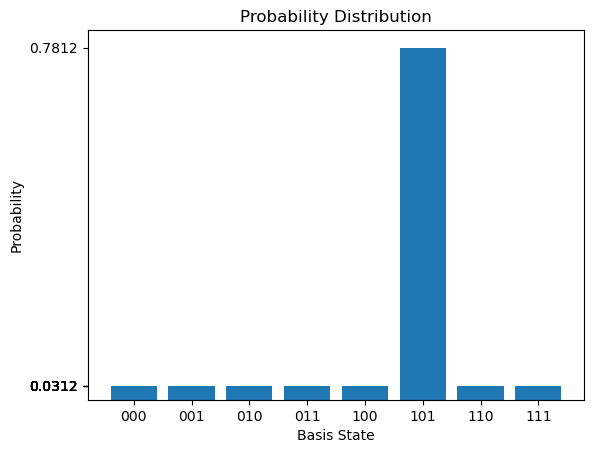

In [7]:
#Run the algorithm

n_qubits = 3
id = [1,0,1]
itarations = 1

dev = qml.device("default.qubit", wires=n_qubits)

Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, id, iterations=itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



#### 5. Uknown number of solutions <a id="unknown"></a>

In [1]:
import pennylane as qml
from pennylane import numpy as np


In [ ]:
def grover(n_qubits, iterations="optimal"):

    #create registers 
    input_registers = range(n_qubits)
    #ancilla_register = [n_qubits]

    #superposition
    qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

    #qml.PauliX(wires=ancilla_register)
    #qml.Hadamard(wires=ancilla_register)

    qml.Barrier()

    if iterations == "optimal":
        its = int(np.round(np.pi/4*np.sqrt(2**n_qubits)))
    else:
        its = iterations
        
    for _ in range(its):
        #oracle
        qml.Adder(1, input_registers, 2**n_qubits)
        
        for i,k in enumerate([0,0,0,0,0,1]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        for i,k in enumerate([0,0,0,0,0,1]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])

        for i,k in enumerate([0,0,0,0,1,0]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        for i,k in enumerate([0,0,0,0,1,0]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])

        for i,k in enumerate([0,0,0,0,1,1]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        for i,k in enumerate([0,0,0,0,1,1]):
            if k == 0:
                qml.PauliX(wires=input_registers[i])
    
        qml.Adder(-1, input_registers, 2**n_qubits)


        #or using the MultiControlledX gate with control state
        #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

        qml.Barrier()
        
        #diffusion
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.broadcast(qml.PauliX, wires=input_registers, pattern="single")
        qml.broadcast(qml.Hadamard, wires=input_registers, pattern="single")

        qml.Barrier()
    

    #measurement
    return qml.probs(wires=input_registers)

Text(0.5, 1.0, 'Probability Distribution')

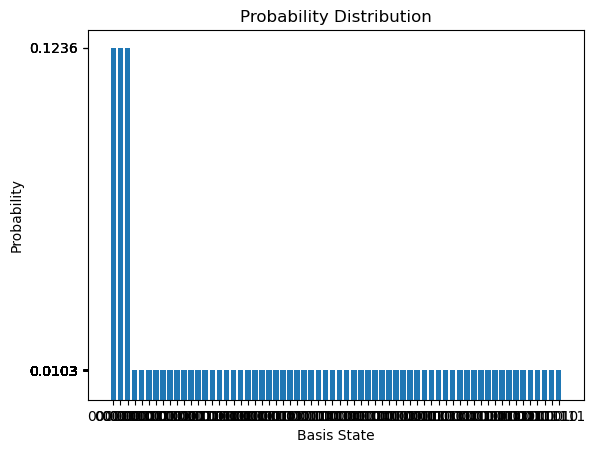

In [32]:
#Run the algorithm

n_qubits = 6
itarations = 1

dev = qml.device("default.qubit")#, wires=n_qubits)

Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, iterations=itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")



In [21]:
np.pi/4*np.sqrt(2**6 / 3)

3.6275987284684352

In [38]:
np.ceil(4.3)

5.0